Train shape: (2350, 21)
Test shape: (588, 21)


C:\Users\Electrobot\AppData\Local\Temp\ipykernel_4644\3383810834.py:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Electrobot\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


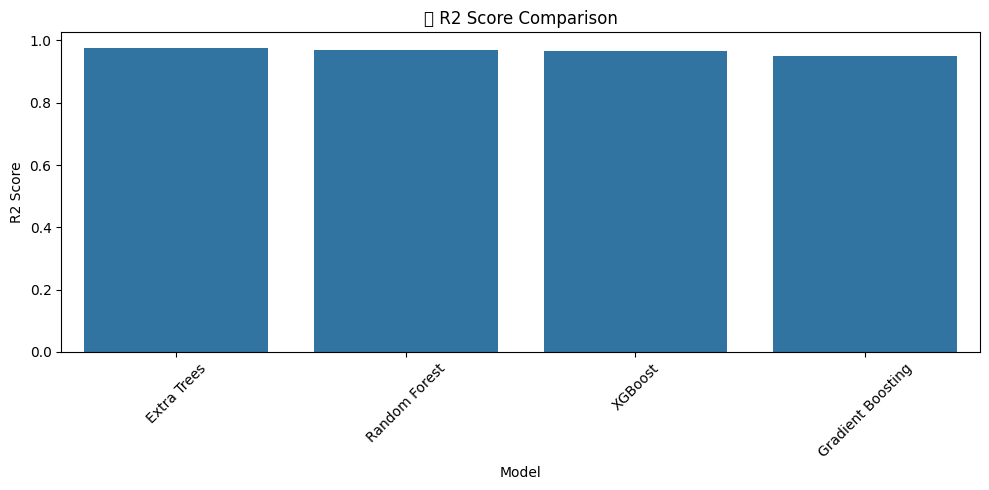

C:\Users\Electrobot\AppData\Local\Temp\ipykernel_4644\3383810834.py:60: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Electrobot\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


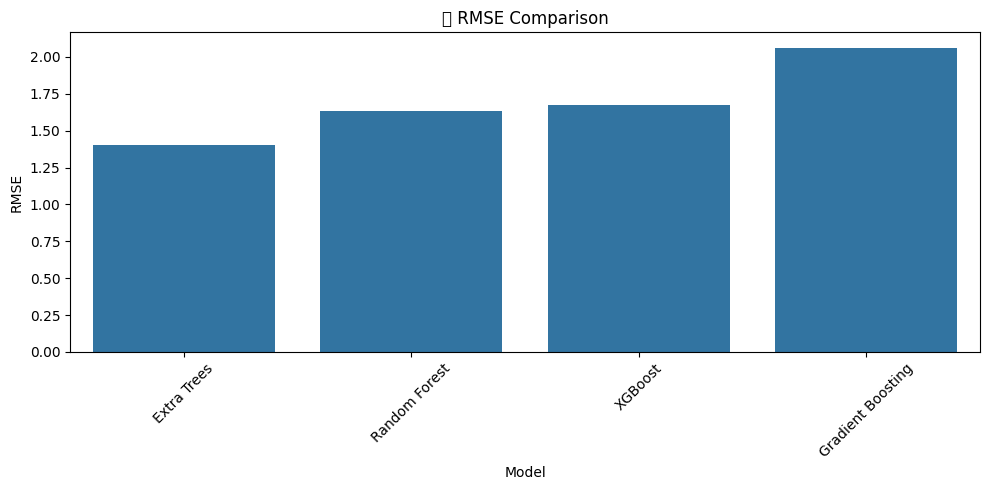

Cross-Validation R2 Mean: 0.9649766596468081
Cross-Validation R2 Std: 0.004374603915796835


C:\Users\Electrobot\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


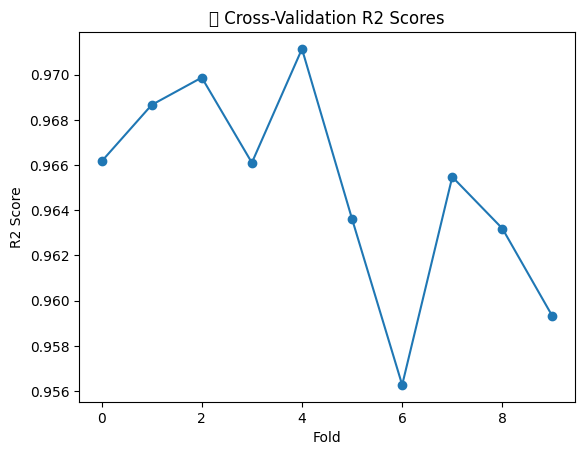

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cleaned_data.csv')
df.head()

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])

X = df.drop(columns='Life expectancy ')
y = df['Life expectancy ']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='R2 Score')
plt.title("🔍 R2 Score Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title("📉 RMSE Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.model_selection import cross_val_score, KFold

best_model = XGBRegressor()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(best_model, X_scaled, y, cv=kf, scoring='r2')
print("Cross-Validation R2 Mean:", scores.mean())
print("Cross-Validation R2 Std:", scores.std())

plt.plot(scores, marker='o')
plt.title("📊 Cross-Validation R2 Scores")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()
